# Figure 3 finalisation

In [58]:
library(ggplot2)
library(clusterProfiler)
library(ReactomePA)
library(cowplot)

In [59]:
# Output dir
out.dir = "/workstation//project_results/landstrom_core/PRAD_specific_analysis/DE_by_predicted_risk"

## Read in data

In [60]:
# Save volcano input to RDS 
pfi.de.results = readRDS(file.path(out.dir, "PFI_volcano_input.rds"))
ora.obj = readRDS(file.path(out.dir, "PFI_ORA_dotplot_input.rds"))

In [61]:
pfi.de.results.selected = pfi.de.results %>% filter(X %in% c("KIF23",
                                                             "AURKA",
                                                             "AURKB", 
                                                             "BIRC5", 
                                                             "KIF2C",
                                                             "UBE2C",
                                                             "CENPA",
                                                             "CDCA8", 
                                                             "PTTG1",
                                                             "PLK1",
                                                             "TPX2",
                                                             "DLGAP5",
                                                             "KIF15",
                                                             "TACC3",
                                                             "KIF4A"))

In [62]:
annotations.df = data.frame(Gene = pfi.de.results.selected$X,
                            x = pfi.de.results.selected$log2FoldChange,
                            x_end = 0,
                            y = -1 * log10(pfi.de.results.selected$pvalue),
                            y_end = -1 * log10(pfi.de.results.selected$pvalue) + 5)

# Prepare plots

In [63]:
enrichment.dotplot = dotplot(ora.obj, showCategory=30)

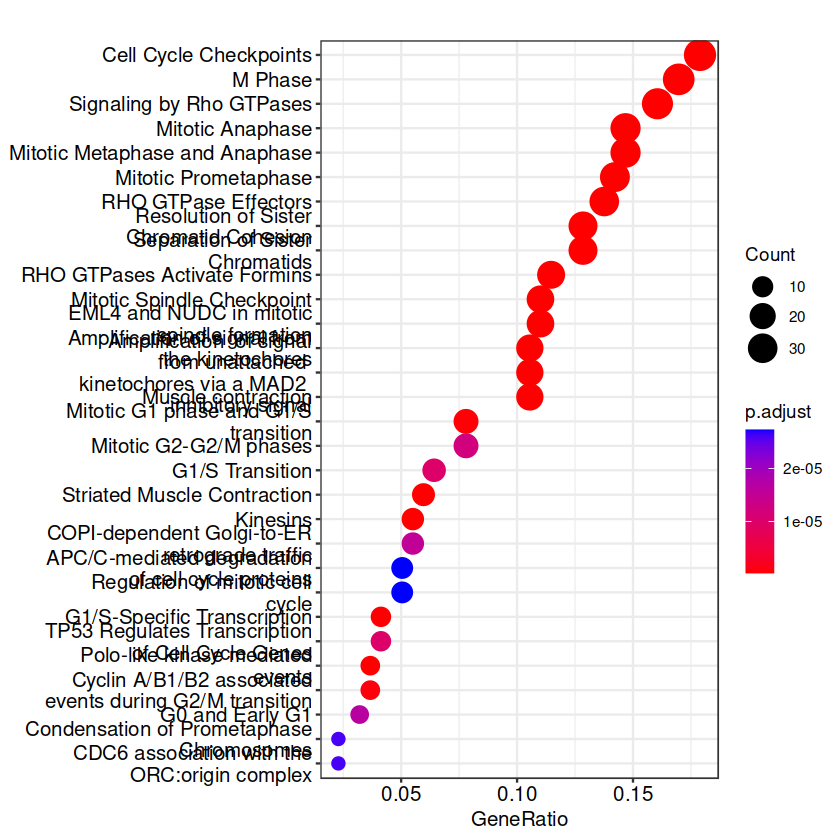

In [64]:
enrichment.dotplot

In [65]:
enrichment.dotplot.final = enrichment.dotplot$data %>% 
                       ggplot(aes(y = Description, x = GeneRatio,size = Count, colour = p.adjust)) + 
                        geom_point() + theme_bw() + theme(axis.text.y = element_text(size = 10, color = "black"),
                        axis.text.x = element_text(size = 10, colour = "black"),
                        axis.title.x = element_text(colour = "black"),
                        axis.title.y = element_blank()) 

In [66]:
library(scales)

In [67]:
enrichment.dotplot$data$Description = as.character(enrichment.dotplot$data$Description)

In [68]:
enrichment.dotplot$data$Description[4] = "Amp. of signal from unatt. kinetochores via MAD2 inh. signal"

In [69]:
enrichment.dotplot$data$Description = factor(enrichment.dotplot$data$Description, levels =  enrichment.dotplot$data$Description[order(enrichment.dotplot$data$GeneRatio)])

In [93]:
fake.data = enrichment.dotplot$data

In [98]:
fake.data$Count[1] = 20 

In [100]:
fake.data$Count[3] = 15

In [102]:
fake.data$Count[4] = 10

In [103]:
fake.data$Count

[1] 20 39 15 10 31 24 24 32 32 25 28 37 13 30 35 23  8 12  9 17  8 14  9 17 12
[26]  7  5  5 11 11

In [111]:
data.frame(x = fake.data$Description, y = fake.data$Count, z =  fake.data$GeneRatio) %>% arrange(z)

x,y,z
<fct>,<dbl>,<dbl>
Condensation of Prometaphase Chromosomes,5,0.02293578
CDC6 association with the ORC:origin complex,5,0.02293578
G0 and Early G1,7,0.03211009
Polo-like kinase mediated events,8,0.03669725
Cyclin A/B1/B2 associated events during G2/M transition,8,0.03669725
G1/S-Specific Transcription,9,0.04128440
TP53 Regulates Transcription of Cell Cycle Genes,9,0.04128440
APC/C-mediated degradation of cell cycle proteins,11,0.05045872
Regulation of mitotic cell cycle,11,0.05045872


In [104]:
enrichment.dotplot.final.test.fake = fake.data %>% 
                       ggplot(aes(y = Description, x = GeneRatio,size = Count, fill = p.adjust)) + 
                        geom_point(shape = 21, colour = "black") + theme_bw() + theme(axis.text.y = element_text(size = 6, color = "black"),
                        axis.text.x = element_text(size = 6, colour = "black"),
                        axis.title.x = element_text(colour = "black"),
                        axis.title.y = element_blank(),
                        legend.position = "bottom") + scale_fill_gradient(low = "steelblue", high = "white")

In [106]:
save_plot(enrichment.dotplot.final.test.fake, filename = "Final3B_fake.pdf", base_height = 6, base_width = 4.28)

In [70]:
enrichment.dotplot.final.test = enrichment.dotplot$data %>% 
                       ggplot(aes(y = Description, x = GeneRatio,size = Count, fill = p.adjust)) + 
                        geom_point(shape = 21, colour = "black") + theme_bw() + theme(axis.text.y = element_text(size = 6, color = "black"),
                        axis.text.x = element_text(size = 6, colour = "black"),
                        axis.title.x = element_text(colour = "black"),
                        axis.title.y = element_blank(),
                        legend.position = "bottom") + scale_fill_gradient(low = "steelblue", high = "white")

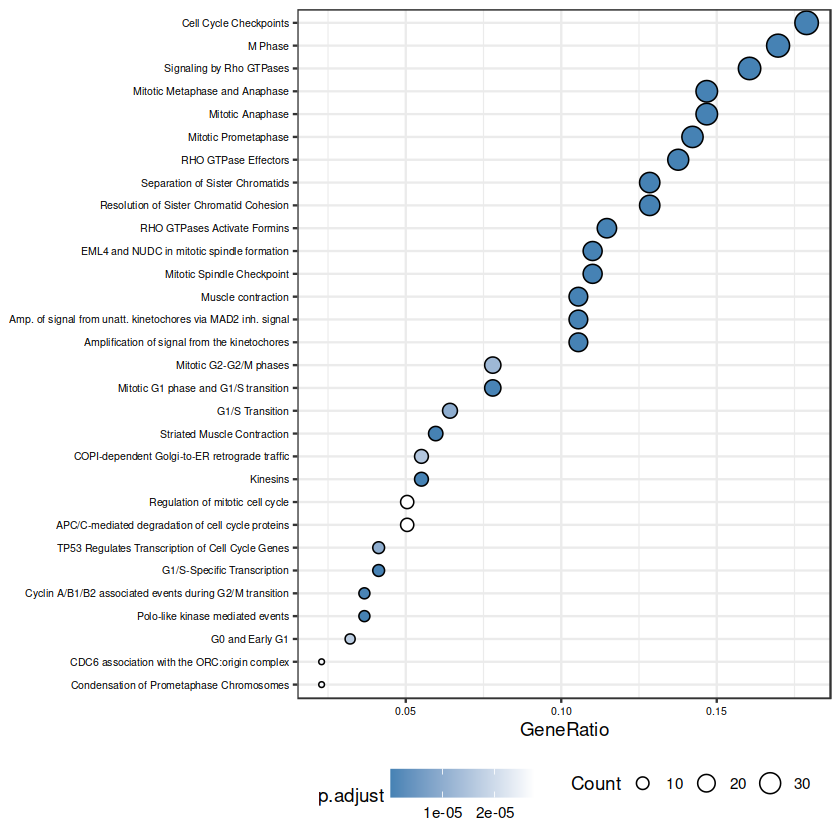

In [71]:
enrichment.dotplot.final.test

In [72]:
volcano.plot = ggplot(pfi.de.results, aes(x = log2FoldChange, y = -1 * log10(pvalue), colour = Significant)) + geom_point() + 
                                        scale_color_manual(values = c("yes" = "red", "no" = "#424242")) +
                                        theme_bw() + theme(axis.text = element_text(size = 12, colour = "black"),
                                                           axis.title = element_text(size = 14, colour = "black")) + xlim(-4,4) +
                                        geom_text(data = annotations.df, aes(x = x_end, y = y_end,label = Gene), colour = "black") +
                                        geom_segment(data = annotations.df, aes(x = x, xend = x_end, y = y, yend = y_end), colour = "black") 

Warning message:
“Removed 2 rows containing missing values (geom_point).”


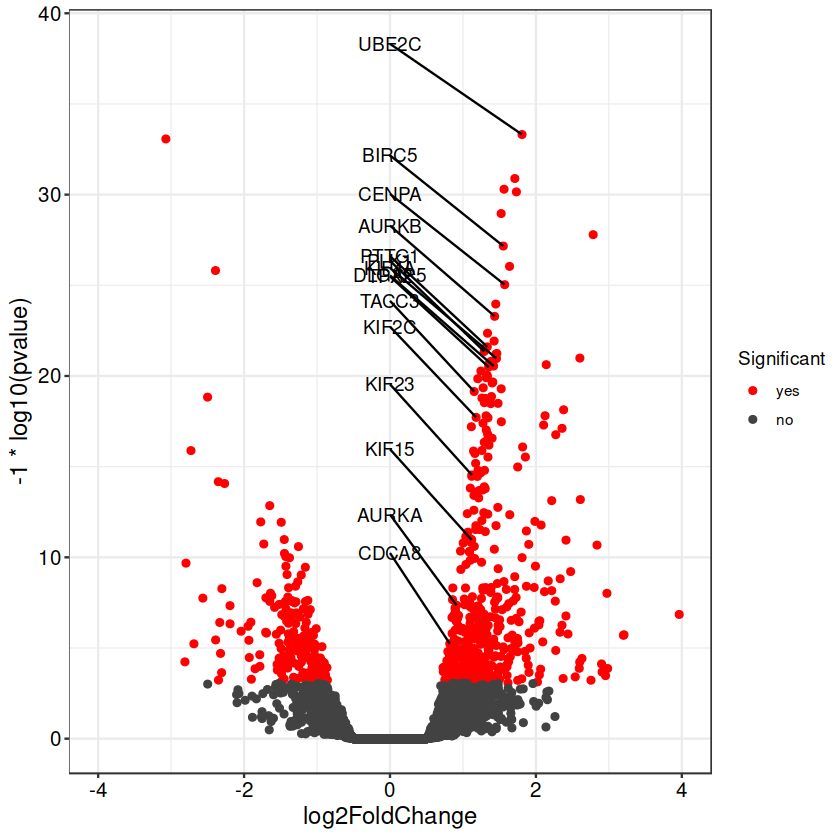

In [73]:
volcano.plot

In [74]:
save_plot(volcano.plot, filename = "Final3A.pdf", base_height = 6, base_width = 5)

Warning message:
“Removed 2 rows containing missing values (geom_point).”


In [75]:
save_plot(enrichment.dotplot.final.test, filename = "Final3B.pdf", base_height = 6, base_width = 4.28)